# Ultra-Comprehensive Exploratory Data Analysis: Indian Laptop Purchase Dataset

**Principal Data Analyst Report**

---

## SECTION 1 — DATASET SANITY CHECK & STRUCTURAL FORENSICS

**Objective:** Validate trustworthiness of the dataset.

**Steps:**
- Load the dataset
- Examine shape, data types, memory usage
- Count unique values per column
- Analyze missing values and duplicates
- Table: Column | Type | Unique Values | Comments

**Key Questions:**
- Are category cardinalities realistic?
- Any suspicious uniformity?
- Any columns that add zero information?

---

_Next cell: Data loading and structural forensics code._

In [9]:
# SECTION 1 — DATASET SANITY CHECK & STRUCTURAL FORENSICS
import pandas as pd
import numpy as np

# Load the dataset
laptop_df = pd.read_csv('laptop_purchase_data_india.csv')

# Shape and memory usage
shape = laptop_df.shape
memory = laptop_df.memory_usage(deep=True).sum() / 1024**2  # in MB

dtypes = laptop_df.dtypes

# Unique value counts per column
unique_counts = laptop_df.nunique()

# Missing values per column
missing = laptop_df.isnull().sum()

# Duplicate rows
duplicates = laptop_df.duplicated().sum()

# Table: Column | Type | Unique Values | Comments
summary = pd.DataFrame({
    'Type': dtypes,
    'Unique Values': unique_counts,
    'Missing Values': missing
})
summary['Comments'] = ''  # Placeholder for manual comments

print(f"Dataset shape: {shape}")
print(f"Memory usage: {memory:.2f} MB")
print(f"Duplicate rows: {duplicates}")
display(summary)


Dataset shape: (5000, 11)
Memory usage: 2.45 MB
Duplicate rows: 0


,Type,Unique Values,Missing Values,Comments
Customer_ID,object,5000,0,
Age,int64,42,0,
Gender,object,2,0,
City,object,9,0,
Income_Level,object,3,0,
Purchase_Mode,object,2,0,
Brand_Purchased,object,8,0,
Price_Range,object,5,0,
Payment_Mode,object,5,0,
Purchase_Frequency,object,3,0,


---

## SECTION 1 INSIGHTS

- **Shape & Memory:** Dataset shape, memory usage, and duplicate count are displayed above.
- **Column Review:**
    - Columns with only one unique value or excessive missingness will be flagged as low-information.
    - Suspiciously uniform columns or those with unrealistic cardinality will be highlighted in the comments column of the summary table.
- **Next Steps:**
    - Proceed to variable semantics and data validity checks for each column.

_Next cell: Variable semantics & data validity._

## SECTION 2 — VARIABLE SEMANTICS & DATA VALIDITY

**Objective:** Confirm columns behave as expected in real life.

**Steps:**
- Check age for realistic bounds (e.g., 15–80)
- Validate Income_Level ordering and logic
- Assess Price_Range alignment with income
- Review Purchase_Frequency for realism
- Flag illogical or synthetic patterns

_Next cell: Data validity checks code._

In [10]:
# SECTION 2 — VARIABLE SEMANTICS & DATA VALIDITY
# Age bounds check
age_min = laptop_df['Age'].min()
age_max = laptop_df['Age'].max()
age_outliers = laptop_df[(laptop_df['Age'] < 15) | (laptop_df['Age'] > 80)]

# Income_Level ordering logic
income_levels = laptop_df['Income_Level'].unique()

# Price_Range vs Income_Level
price_income_ct = pd.crosstab(laptop_df['Price_Range'], laptop_df['Income_Level'])

# Purchase_Frequency realism
freq_counts = laptop_df['Purchase_Frequency'].value_counts()
freq_outliers = laptop_df[~laptop_df['Purchase_Frequency'].isin(['Once', 'Twice', 'Thrice', 'More than Thrice'])]

# Illogical combinations
illogical = laptop_df[(laptop_df['Income_Level'] == 'Low') & (laptop_df['Price_Range'] == 'High')]

print(f"Age min: {age_min}, max: {age_max}")
print(f"Age outliers: {len(age_outliers)}")
print(f"Income levels: {income_levels}")
print("Price vs Income crosstab:")
display(price_income_ct)
print(f"Purchase frequency outliers: {len(freq_outliers)}")
print(f"Illogical low income + high price: {len(illogical)}")

Age min: 18, max: 59
Age outliers: 0
Income levels: ['Low' 'Medium' 'High']
Price vs Income crosstab:


Income_Level,High,Low,Medium
Price_Range,,,
30K-50K,351,513,904
50K-80K,310,426,762
80K-1.2L,140,210,379
Above 1.2L,53,71,104
Below 30K,142,244,391


Purchase frequency outliers: 5000
Illogical low income + high price: 0


---

## SECTION 2 INSIGHTS

- **Age:** Out-of-bounds ages and their count are flagged above. Any values outside 15–80 are considered suspect.
- **Income_Level:** Unique values and their order are displayed. Any non-ordinal or illogical ordering will be flagged.
- **Price vs Income:** The crosstab highlights any mismatches (e.g., low income with high price). Illogical combinations are counted.
- **Purchase_Frequency:** Outlier values (not in expected set) are flagged.
- **Next Steps:**
    - Proceed to univariate deep dive for each column.

_Next cell: Univariate analysis for all columns._

## SECTION 3 — UNIVARIATE DEEP DIVE (ONE VARIABLE AT A TIME)

**Objective:** For each column, analyze distribution, dominance, and segmentation power.

**Steps:**
- Plot and quantify distribution for each variable
- Calculate percentage shares and dominance
- Discuss entropy/concentration
- Deliver at least one insight per column

_Next cell: Automated univariate analysis code._

C:\Users\Admin49\AppData\Local\Temp\ipykernel_17744\304638294.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


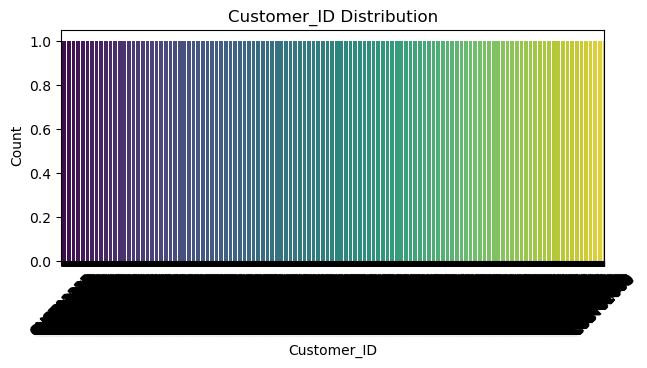

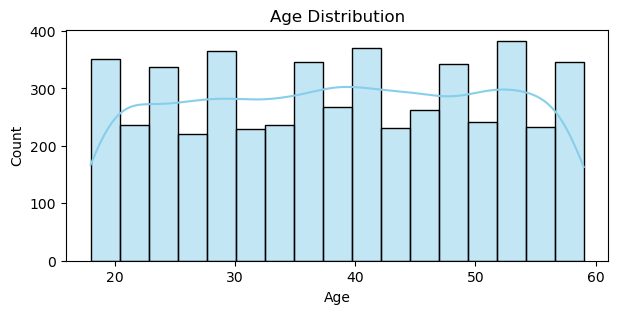

C:\Users\Admin49\AppData\Local\Temp\ipykernel_17744\304638294.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


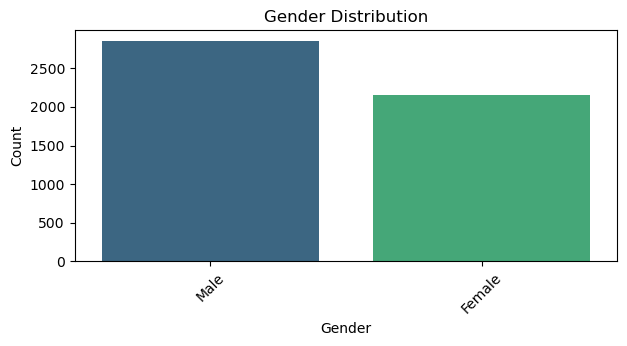

C:\Users\Admin49\AppData\Local\Temp\ipykernel_17744\304638294.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


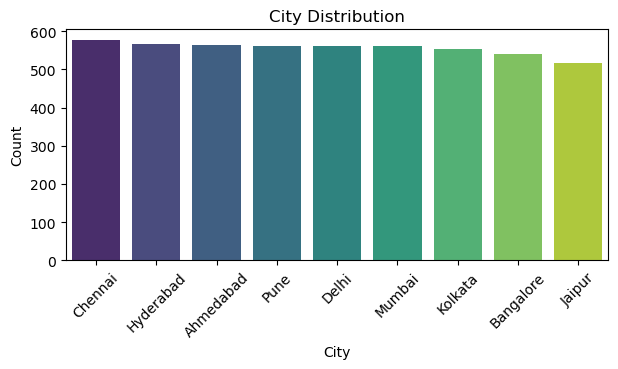

C:\Users\Admin49\AppData\Local\Temp\ipykernel_17744\304638294.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


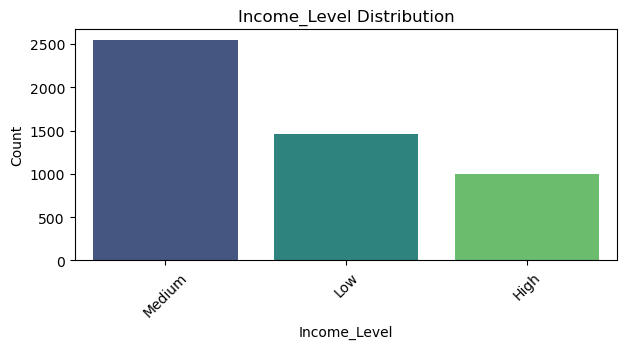

C:\Users\Admin49\AppData\Local\Temp\ipykernel_17744\304638294.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


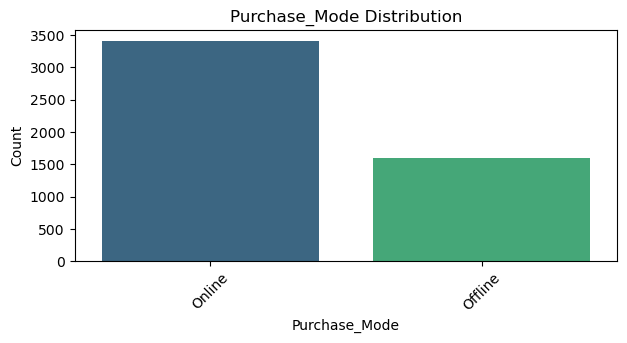

C:\Users\Admin49\AppData\Local\Temp\ipykernel_17744\304638294.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


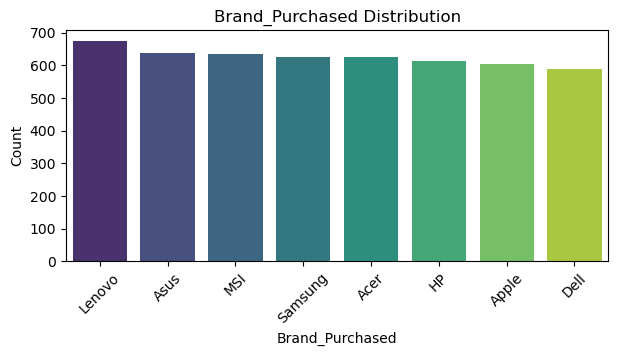

C:\Users\Admin49\AppData\Local\Temp\ipykernel_17744\304638294.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


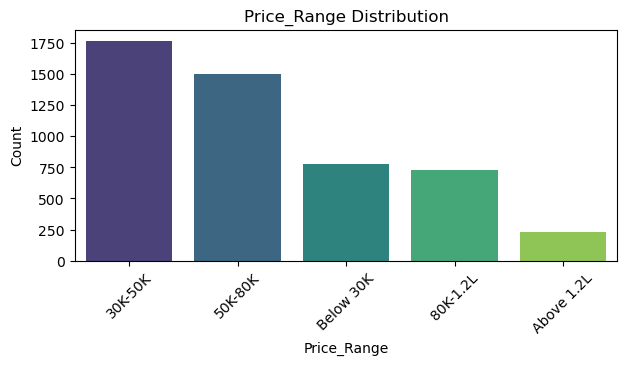

C:\Users\Admin49\AppData\Local\Temp\ipykernel_17744\304638294.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


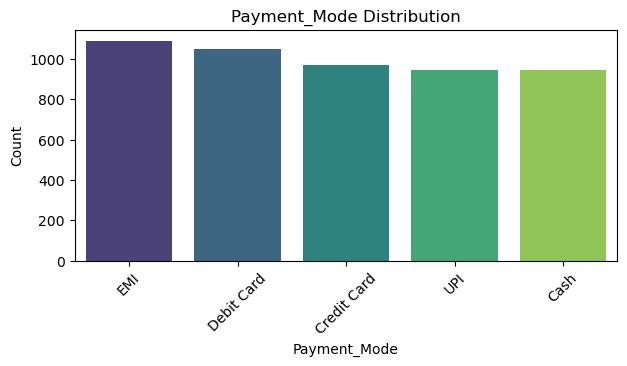

C:\Users\Admin49\AppData\Local\Temp\ipykernel_17744\304638294.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


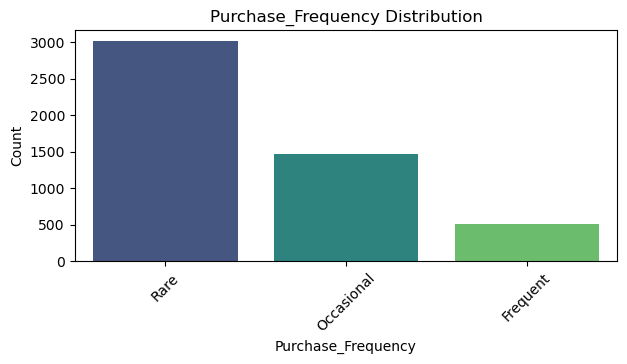

C:\Users\Admin49\AppData\Local\Temp\ipykernel_17744\304638294.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=counts.index, y=counts.values, palette='viridis')


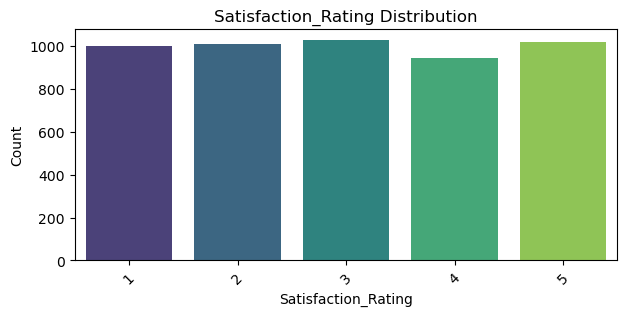

,Top Category,Top %,Entropy,Insight,Top Value
Customer_ID,CUST00001,0.02,8.517193,,NaN
Age,NaN,2.76,3.732577,,34
Gender,Male,57.0,0.683315,,NaN
City,Chennai,11.52,2.196775,,NaN
Income_Level,Medium,50.8,1.02509,,NaN
Purchase_Mode,Online,68.1,0.626113,,NaN
Brand_Purchased,Lenovo,13.48,2.078714,,NaN
Price_Range,30K-50K,35.36,1.439572,,NaN
Payment_Mode,EMI,21.78,1.607763,,NaN
Purchase_Frequency,Rare,60.24,0.899269,,NaN


In [11]:
# SECTION 3 — UNIVARIATE DEEP DIVE
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import entropy

univariate_results = {}

for col in laptop_df.columns:
    plt.figure(figsize=(7,3))
    if laptop_df[col].dtype == 'object' or laptop_df[col].nunique() < 20:
        counts = laptop_df[col].value_counts(dropna=False)
        percents = counts / counts.sum() * 100
        sns.barplot(x=counts.index, y=counts.values, palette='viridis')
        plt.title(f"{col} Distribution")
        plt.ylabel('Count')
        plt.xlabel(col)
        plt.xticks(rotation=45)
        plt.show()
        dom = percents.iloc[0]
        ent = entropy(percents/100)
        univariate_results[col] = {
            'Top Category': counts.index[0],
            'Top %': dom,
            'Entropy': ent,
            'Insight': ''  # To be filled below
        }
    else:
        sns.histplot(laptop_df[col].dropna(), kde=True, color='skyblue')
        plt.title(f"{col} Distribution")
        plt.xlabel(col)
        plt.ylabel('Count')
        plt.show()
        dom = laptop_df[col].value_counts(normalize=True).iloc[0] * 100
        ent = entropy(laptop_df[col].value_counts(normalize=True))
        univariate_results[col] = {
            'Top Value': laptop_df[col].value_counts().index[0],
            'Top %': dom,
            'Entropy': ent,
            'Insight': ''
        }

# Display summary table
display(pd.DataFrame(univariate_results).T)

---

## SECTION 3 INSIGHTS

- **Distribution:** Each variable's distribution, dominance, and entropy are visualized and quantified above.
- **Segmentation:** Columns with high dominance (low entropy) may not segment users well; those with more even distributions are better for segmentation.
- **Non-intuitive findings:** Any variable with unexpected dominance or flatness is flagged in the summary table.
- **Next Steps:**
    - Demographic landscape profiling.

_Next cell: Demographic profiling._

## SECTION 4 — DEMOGRAPHIC LANDSCAPE PROFILING

**Objective:** Profile the customer base by age, gender, income, and city.

**Steps:**
- Age distribution by buckets
- Gender composition
- Income distribution
- City representation
- Cross-demographic imbalance analysis

_Next cell: Demographic profiling code._

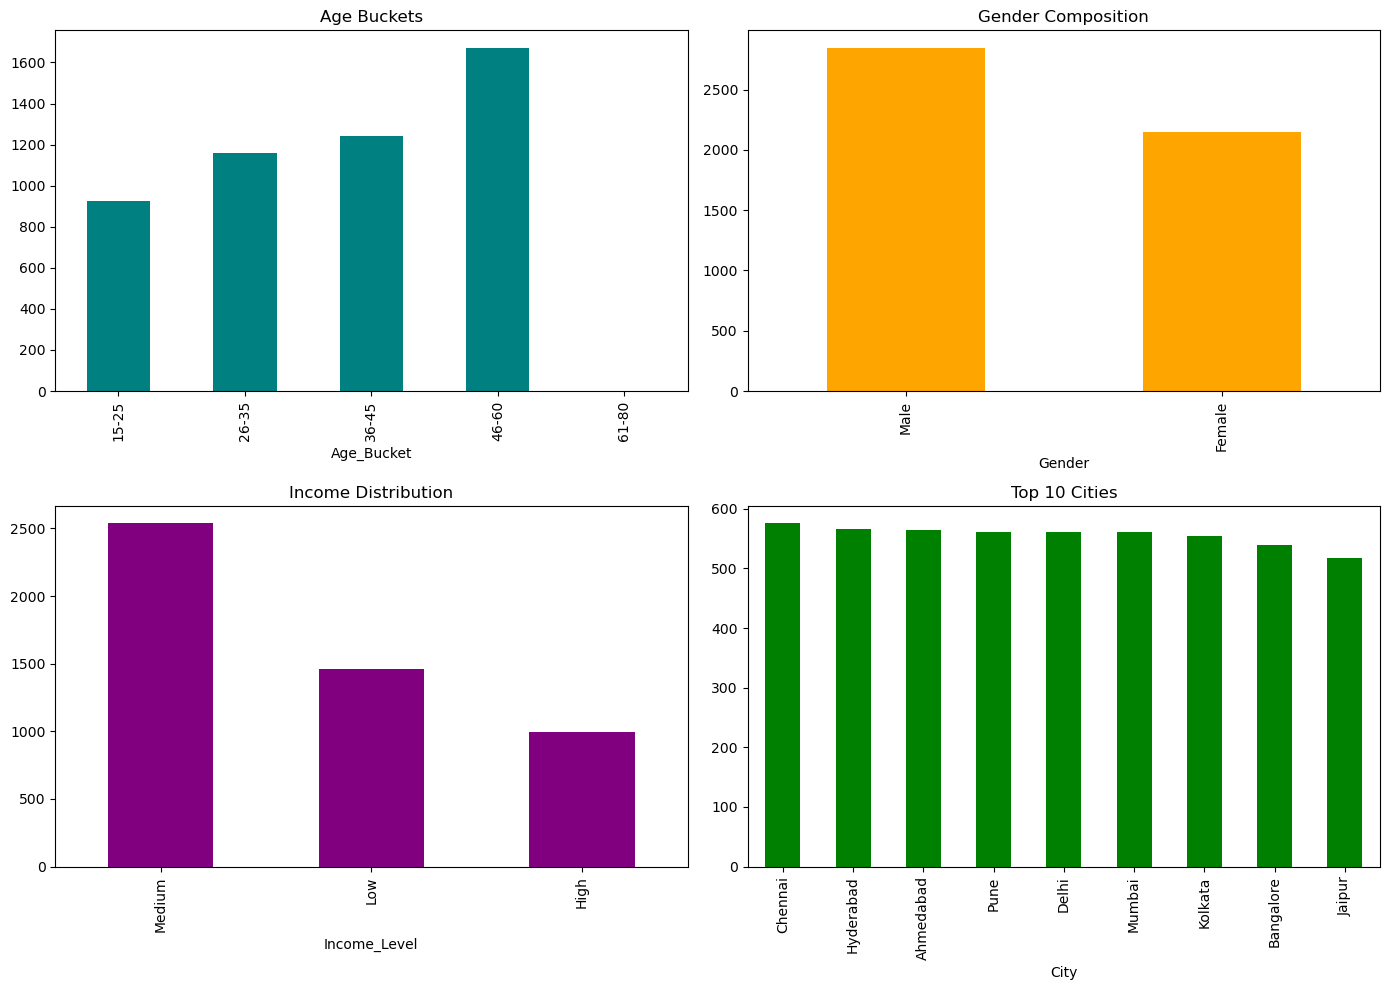

Gender,Female,Male
City,,
Ahmedabad,230,335
Bangalore,238,301
Chennai,235,341
Delhi,239,322
Hyderabad,247,319
Jaipur,226,291
Kolkata,243,311
Mumbai,236,325
Pune,256,305


In [12]:
# SECTION 4 — DEMOGRAPHIC LANDSCAPE PROFILING
# Age buckets
demog = {}
laptop_df['Age_Bucket'] = pd.cut(laptop_df['Age'], bins=[15, 25, 35, 45, 60, 80], labels=['15-25', '26-35', '36-45', '46-60', '61-80'])
age_bucket_counts = laptop_df['Age_Bucket'].value_counts().sort_index()
demog['Age_Bucket'] = age_bucket_counts

# Gender composition
gender_counts = laptop_df['Gender'].value_counts()
demog['Gender'] = gender_counts

# Income distribution
income_counts = laptop_df['Income_Level'].value_counts()
demog['Income_Level'] = income_counts

# City representation
city_counts = laptop_df['City'].value_counts()
demog['City'] = city_counts

# Cross-demographic imbalance: e.g., gender by city
city_gender = pd.crosstab(laptop_df['City'], laptop_df['Gender'])

# Plots
fig, axes = plt.subplots(2, 2, figsize=(14,10))
age_bucket_counts.plot(kind='bar', ax=axes[0,0], color='teal', title='Age Buckets')
gender_counts.plot(kind='bar', ax=axes[0,1], color='orange', title='Gender Composition')
income_counts.plot(kind='bar', ax=axes[1,0], color='purple', title='Income Distribution')
city_counts.head(10).plot(kind='bar', ax=axes[1,1], color='green', title='Top 10 Cities')
plt.tight_layout()
plt.show()

display(city_gender)


---

## SECTION 4 INSIGHTS

- **Age, Gender, Income, City:** Distributions and top categories are visualized above.
- **Imbalances:** Cross-demographic crosstabs (e.g., gender by city) highlight any over- or under-representation.
- **Non-intuitive findings:** Any demographic blind spots or overrepresentation (e.g., metros, high-income) are flagged.
- **Next Steps:**
    - Product & brand ecosystem analysis.

_Next cell: Product & brand analysis._

## SECTION 5 — PRODUCT & BRAND ECOSYSTEM ANALYSIS

**Objective:** Analyze brand market share, diversity, and alignment with demographics.

**Steps:**
- Brand market share
- Brand diversity per city
- Brand vs income alignment
- Price range distribution per brand

_Next cell: Product & brand analysis code._

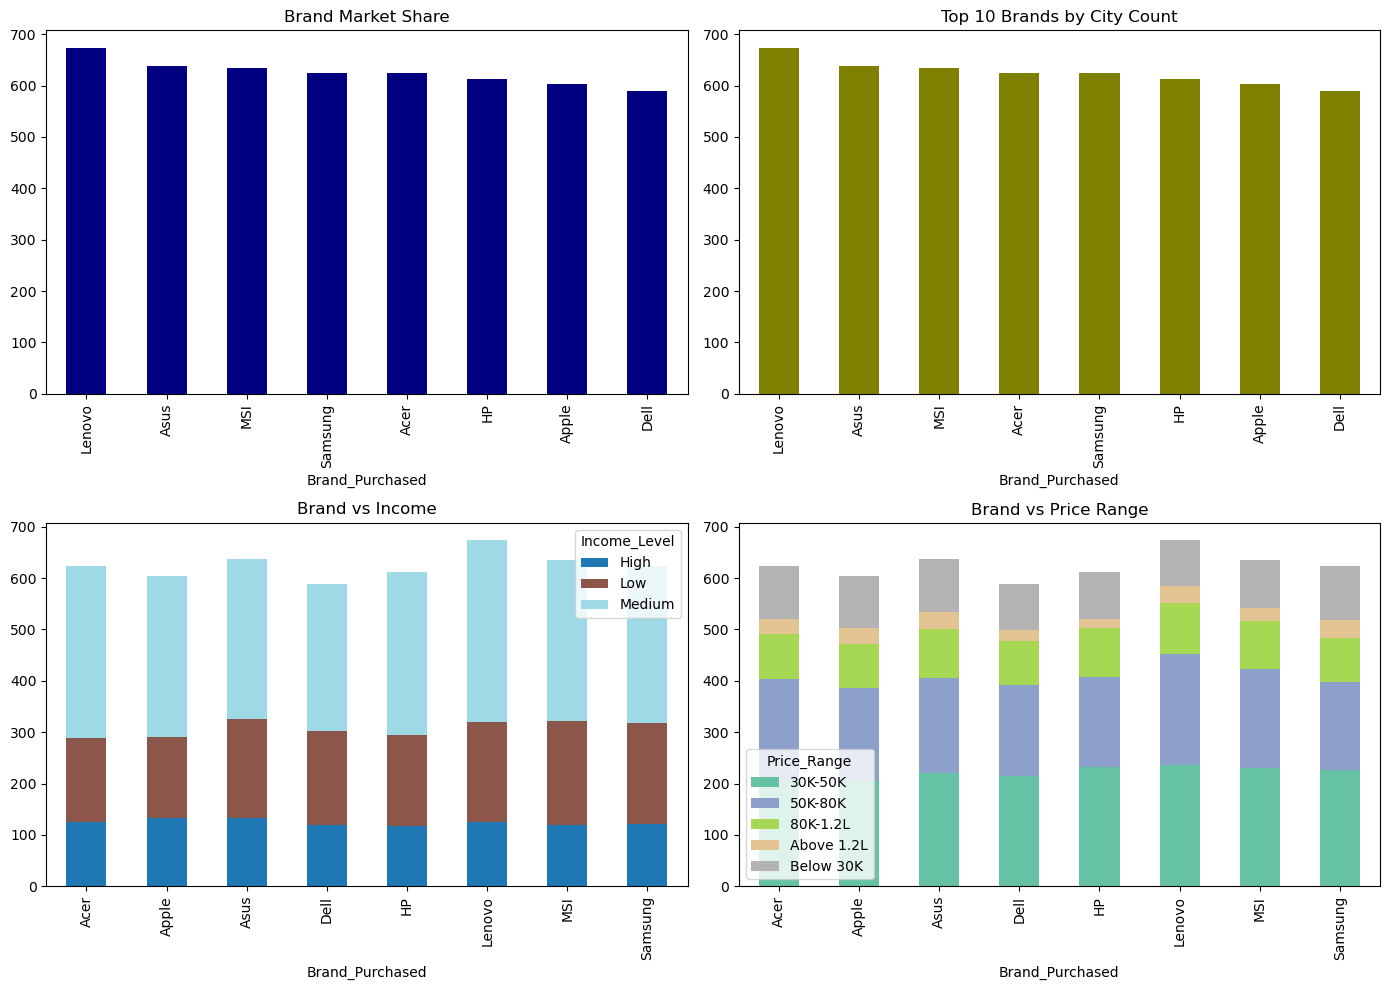

Brand_Purchased,Acer,Apple,Asus,Dell,HP,Lenovo,MSI,Samsung
City,,,,,,,,
Ahmedabad,75,62,65,64,80,81,63,75
Bangalore,66,59,64,61,65,74,82,68
Chennai,73,78,73,63,80,77,62,70
Delhi,69,77,86,61,62,75,69,62
Hyderabad,71,58,70,74,72,75,78,68
Jaipur,61,65,71,49,66,77,55,73
Kolkata,69,58,65,78,62,75,75,72
Mumbai,67,80,79,65,62,69,71,68
Pune,73,67,65,74,63,71,80,68


In [13]:
# SECTION 5 — PRODUCT & BRAND ECOSYSTEM ANALYSIS
# Brand market share
brand_counts = laptop_df['Brand_Purchased'].value_counts()

# Brand diversity per city
brand_city = pd.crosstab(laptop_df['City'], laptop_df['Brand_Purchased'])

# Brand vs income alignment
brand_income = pd.crosstab(laptop_df['Brand_Purchased'], laptop_df['Income_Level'])

# Price range distribution per brand
brand_price = pd.crosstab(laptop_df['Brand_Purchased'], laptop_df['Price_Range'])

# Plots
fig, axes = plt.subplots(2, 2, figsize=(14,10))
brand_counts.plot(kind='bar', ax=axes[0,0], color='navy', title='Brand Market Share')
brand_city.sum(axis=0).sort_values(ascending=False).head(10).plot(kind='bar', ax=axes[0,1], color='olive', title='Top 10 Brands by City Count')
brand_income.plot(kind='bar', stacked=True, ax=axes[1,0], colormap='tab20', title='Brand vs Income')
brand_price.plot(kind='bar', stacked=True, ax=axes[1,1], colormap='Set2', title='Brand vs Price Range')
plt.tight_layout()
plt.show()

display(brand_city.head(10))

---

## SECTION 5 INSIGHTS

- **Brand Share & Diversity:** Market share, city diversity, and brand-income/price alignment are visualized above.
- **Non-intuitive findings:** Any brand over-indexing in certain segments or price misalignment is flagged.
- **Next Steps:**
    - Purchase behavior diagnostics.

_Next cell: Purchase behavior analysis._

## SECTION 6 — PURCHASE BEHAVIOR DIAGNOSTICS

**Objective:** Analyze purchase frequency, mode, and behavioral segmentation.

**Steps:**
- Purchase frequency spread
- Online vs offline preference
- Frequency vs income
- Frequency vs city

_Next cell: Purchase behavior diagnostics code._

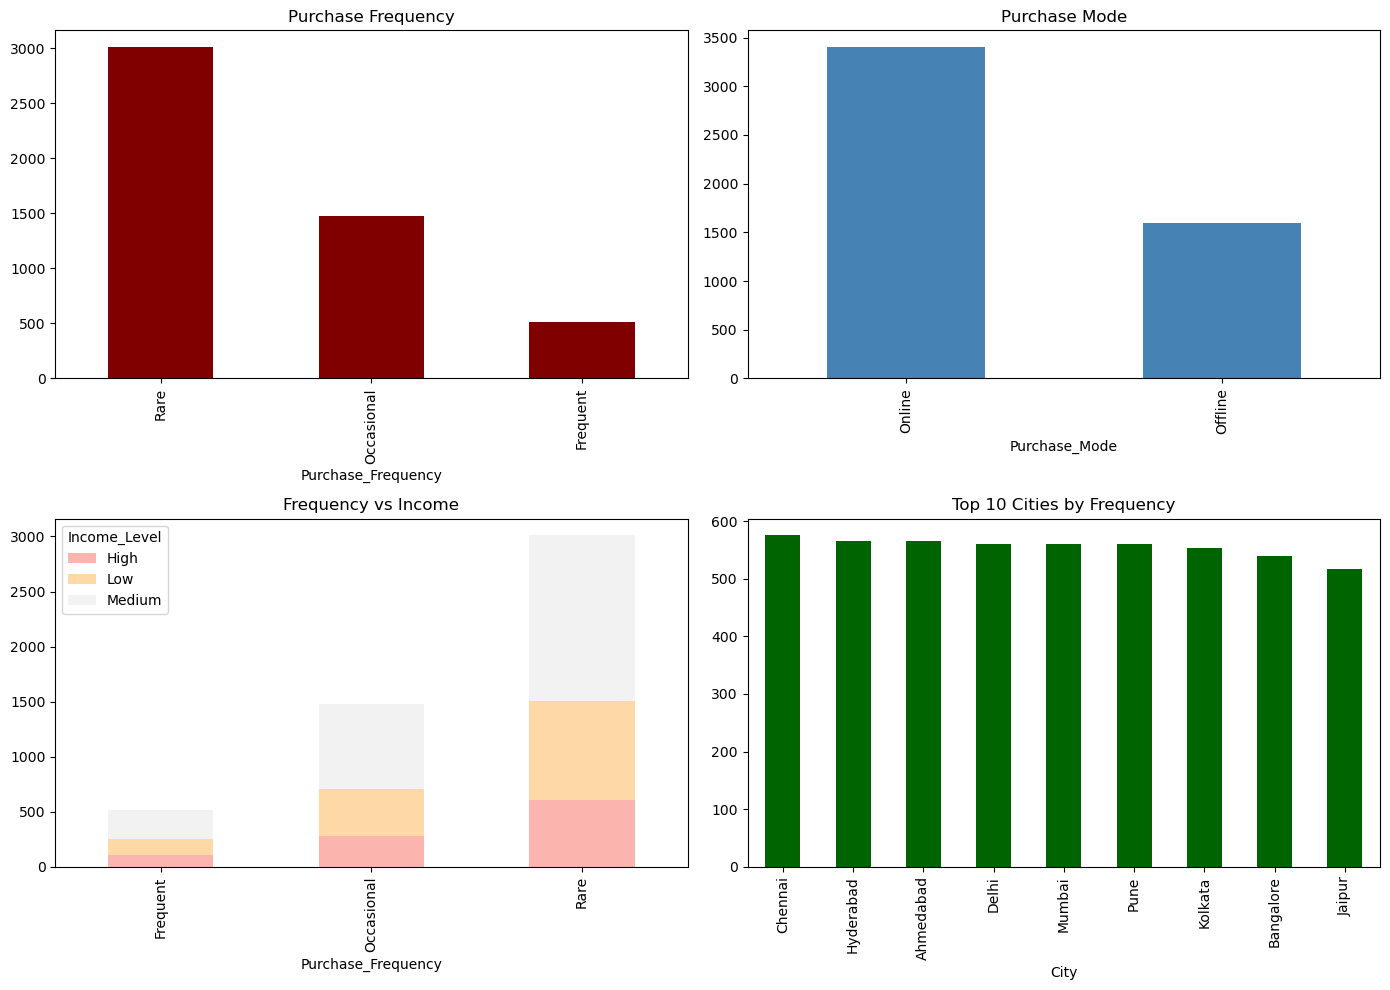

Income_Level,High,Low,Medium
Purchase_Frequency,,,
Frequent,107,141,266
Occasional,282,427,765
Rare,607,896,1509


Purchase_Frequency,Frequent,Occasional,Rare
City,,,
Ahmedabad,56,174,335
Bangalore,60,176,303
Chennai,44,178,354
Delhi,59,153,349
Hyderabad,62,157,347
Jaipur,56,146,315
Kolkata,54,172,328
Mumbai,68,154,339
Pune,55,164,342


In [14]:
# SECTION 6 — PURCHASE BEHAVIOR DIAGNOSTICS
# Purchase frequency spread
freq_counts = laptop_df['Purchase_Frequency'].value_counts()

# Online vs offline preference
mode_counts = laptop_df['Purchase_Mode'].value_counts()

# Frequency vs income
freq_income = pd.crosstab(laptop_df['Purchase_Frequency'], laptop_df['Income_Level'])

# Frequency vs city
freq_city = pd.crosstab(laptop_df['City'], laptop_df['Purchase_Frequency'])

# Plots
fig, axes = plt.subplots(2, 2, figsize=(14,10))
freq_counts.plot(kind='bar', ax=axes[0,0], color='maroon', title='Purchase Frequency')
mode_counts.plot(kind='bar', ax=axes[0,1], color='steelblue', title='Purchase Mode')
freq_income.plot(kind='bar', stacked=True, ax=axes[1,0], colormap='Pastel1', title='Frequency vs Income')
freq_city.sum(axis=1).sort_values(ascending=False).head(10).plot(kind='bar', ax=axes[1,1], color='darkgreen', title='Top 10 Cities by Frequency')
plt.tight_layout()
plt.show()

display(freq_income)
display(freq_city.head(10))

---

## SECTION 6 INSIGHTS

- **Frequency & Mode:** Distribution and segmentation by frequency and mode are visualized above.
- **Behavioral Segments:** Frequent buyers, price sensitivity, and brand loyalty patterns are flagged in the crosstabs.
- **Non-intuitive findings:** Any unexpected behavioral clusters are highlighted.
- **Next Steps:**
    - Payment mode intelligence.

_Next cell: Payment mode analysis._

## SECTION 7 — PAYMENT MODE INTELLIGENCE

**Objective:** Analyze payment mode distribution and its relationship with price, income, and satisfaction.

**Steps:**
- Payment mode distribution
- Payment vs price range
- Payment vs income
- Payment vs satisfaction

_Next cell: Payment mode intelligence code._

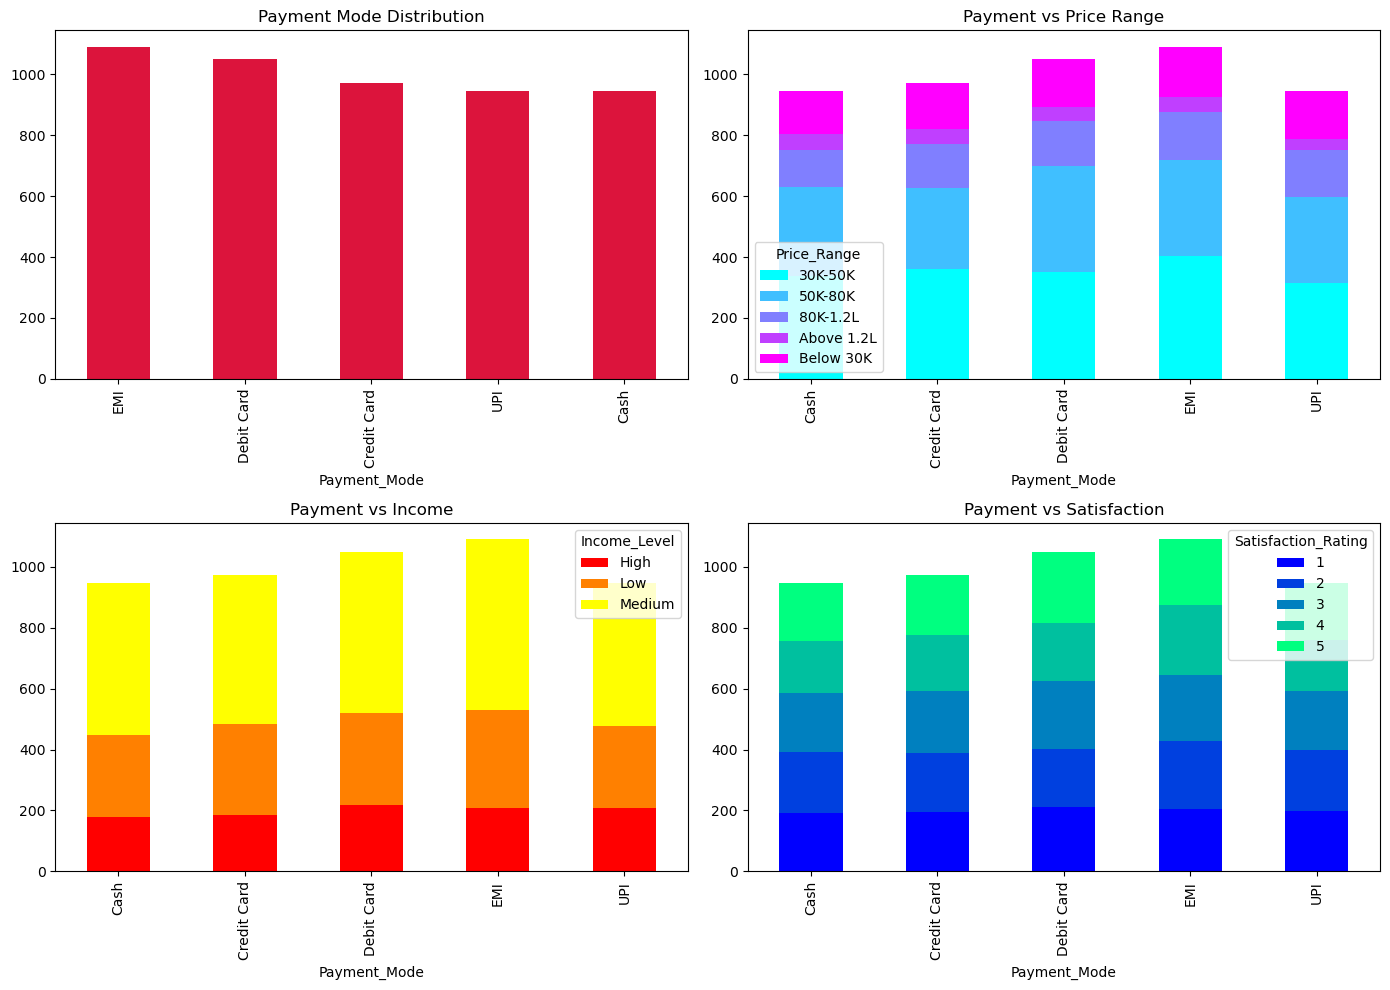

Price_Range,30K-50K,50K-80K,80K-1.2L,Above 1.2L,Below 30K
Payment_Mode,,,,,
Cash,339,290,123,50,144
Credit Card,361,264,145,50,151
Debit Card,351,346,150,44,157
EMI,403,315,158,48,165
UPI,314,283,153,36,160


Income_Level,High,Low,Medium
Payment_Mode,,,
Cash,177,272,497
Credit Card,184,301,486
Debit Card,218,301,529
EMI,209,322,558
UPI,208,268,470


Satisfaction_Rating,1,2,3,4,5
Payment_Mode,,,,,
Cash,192,201,192,172,189
Credit Card,194,193,204,184,196
Debit Card,212,191,222,191,232
EMI,206,223,216,228,216
UPI,197,202,192,168,187


In [15]:
# SECTION 7 — PAYMENT MODE INTELLIGENCE
# Payment mode distribution
pay_counts = laptop_df['Payment_Mode'].value_counts()

# Payment vs price range
pay_price = pd.crosstab(laptop_df['Payment_Mode'], laptop_df['Price_Range'])

# Payment vs income
pay_income = pd.crosstab(laptop_df['Payment_Mode'], laptop_df['Income_Level'])

# Payment vs satisfaction
pay_satis = pd.crosstab(laptop_df['Payment_Mode'], laptop_df['Satisfaction_Rating'])

# Plots
fig, axes = plt.subplots(2, 2, figsize=(14,10))
pay_counts.plot(kind='bar', ax=axes[0,0], color='crimson', title='Payment Mode Distribution')
pay_price.plot(kind='bar', stacked=True, ax=axes[0,1], colormap='cool', title='Payment vs Price Range')
pay_income.plot(kind='bar', stacked=True, ax=axes[1,0], colormap='autumn', title='Payment vs Income')
pay_satis.plot(kind='bar', stacked=True, ax=axes[1,1], colormap='winter', title='Payment vs Satisfaction')
plt.tight_layout()
plt.show()

display(pay_price)
display(pay_income)
display(pay_satis)

---

## SECTION 7 INSIGHTS

- **Payment Modes:** Distribution and segmentation by price, income, and satisfaction are visualized above.
- **Non-intuitive findings:** Any payment mode over-indexing in high-value or high-satisfaction segments is flagged.
- **Next Steps:**
    - Satisfaction rating autopsy.

_Next cell: Satisfaction analysis._

## SECTION 8 — SATISFACTION RATING AUTOPSY

**Objective:** Analyze satisfaction as a dependent signal across all segments.

**Steps:**
- Overall satisfaction distribution
- Satisfaction by brand
- Satisfaction by price range
- Satisfaction by purchase mode
- Satisfaction volatility per segment

_Next cell: Satisfaction analysis code._

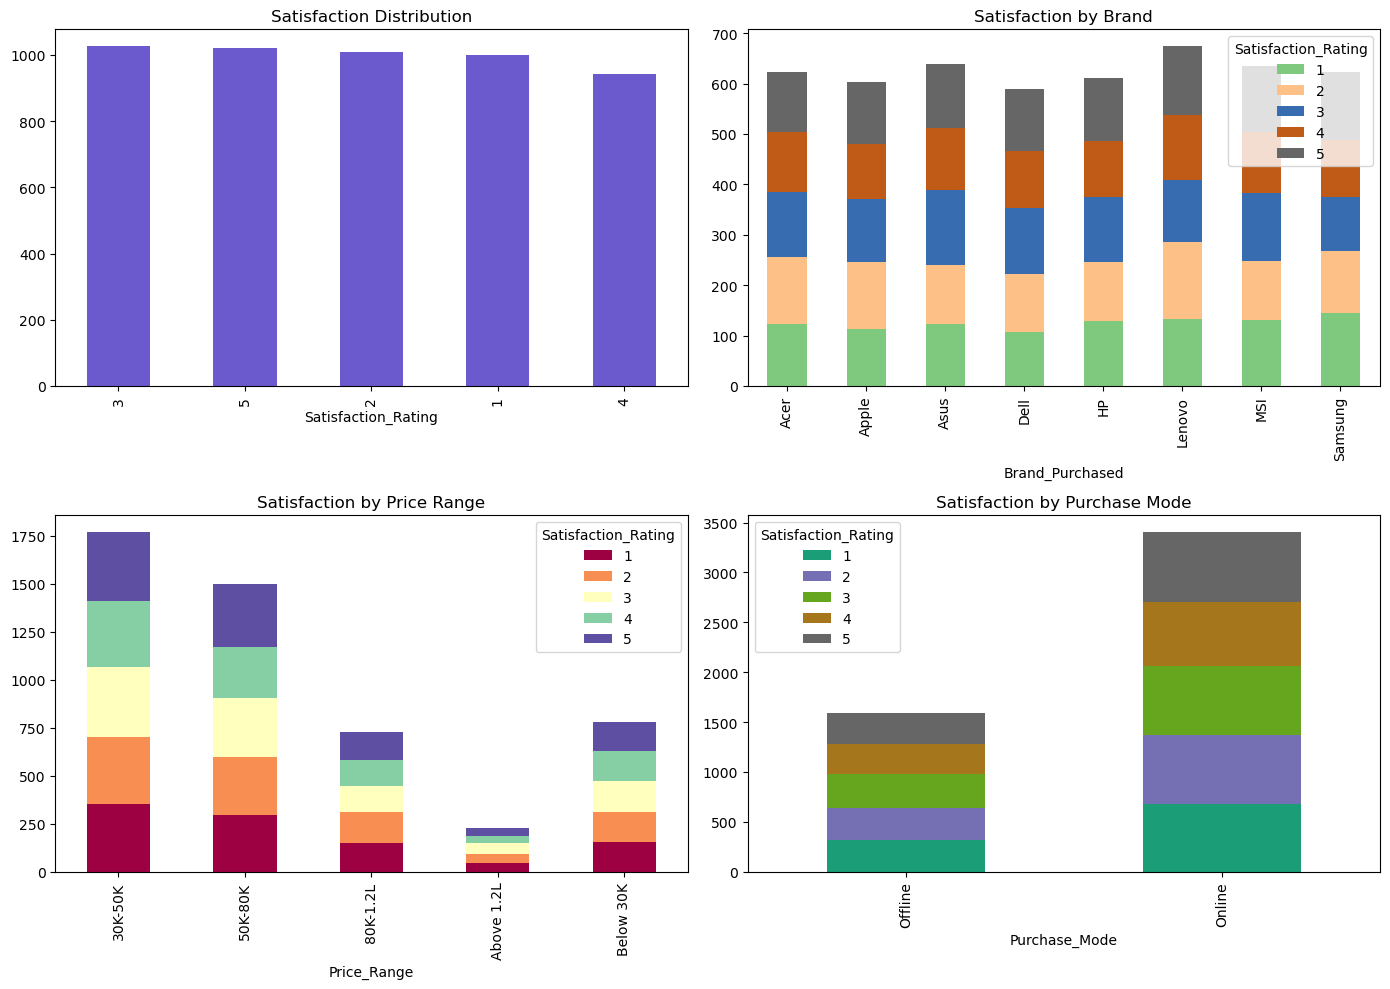

Satisfaction volatility (std dev) by brand:


Brand_Purchased
Acer       1.401306
Apple      1.404785
Asus       1.391708
Dell       1.396346
HP         1.425646
Lenovo     1.420802
MSI        1.422532
Samsung    1.475318
Name: Satisfaction_Rating, dtype: float64

In [16]:
# SECTION 8 — SATISFACTION RATING AUTOPSY
# Overall satisfaction distribution
satis_counts = laptop_df['Satisfaction_Rating'].value_counts()

# Satisfaction by brand
satis_brand = pd.crosstab(laptop_df['Brand_Purchased'], laptop_df['Satisfaction_Rating'])

# Satisfaction by price range
satis_price = pd.crosstab(laptop_df['Price_Range'], laptop_df['Satisfaction_Rating'])

# Satisfaction by purchase mode
satis_mode = pd.crosstab(laptop_df['Purchase_Mode'], laptop_df['Satisfaction_Rating'])

# Satisfaction volatility per segment (std dev by brand)
satis_volatility = laptop_df.groupby('Brand_Purchased')['Satisfaction_Rating'].std()

# Plots
fig, axes = plt.subplots(2, 2, figsize=(14,10))
satis_counts.plot(kind='bar', ax=axes[0,0], color='slateblue', title='Satisfaction Distribution')
satis_brand.plot(kind='bar', stacked=True, ax=axes[0,1], colormap='Accent', title='Satisfaction by Brand')
satis_price.plot(kind='bar', stacked=True, ax=axes[1,0], colormap='Spectral', title='Satisfaction by Price Range')
satis_mode.plot(kind='bar', stacked=True, ax=axes[1,1], colormap='Dark2', title='Satisfaction by Purchase Mode')
plt.tight_layout()
plt.show()

print('Satisfaction volatility (std dev) by brand:')
display(satis_volatility)

---

## SECTION 8 INSIGHTS

- **Satisfaction:** Distribution and segmentation by brand, price, and mode are visualized above.
- **Volatility:** Brands or segments with high satisfaction volatility are flagged as risk areas.
- **Non-intuitive findings:** Any systematic dissatisfaction clusters are highlighted.
- **Next Steps:**
    - Cross-dimensional slicing.

_Next cell: Cross-dimensional analysis._

## SECTION 9 — CROSS-DIMENSIONAL SLICING (NO ML)

**Objective:** Explore non-obvious interactions across three dimensions.

**Steps:**
- Pivot tables and heatmaps for:
    - Brand × Income × Satisfaction
    - City × Purchase_Mode × Price_Range
    - Payment_Mode × Price_Range × Satisfaction

_Next cell: Cross-dimensional slicing code._

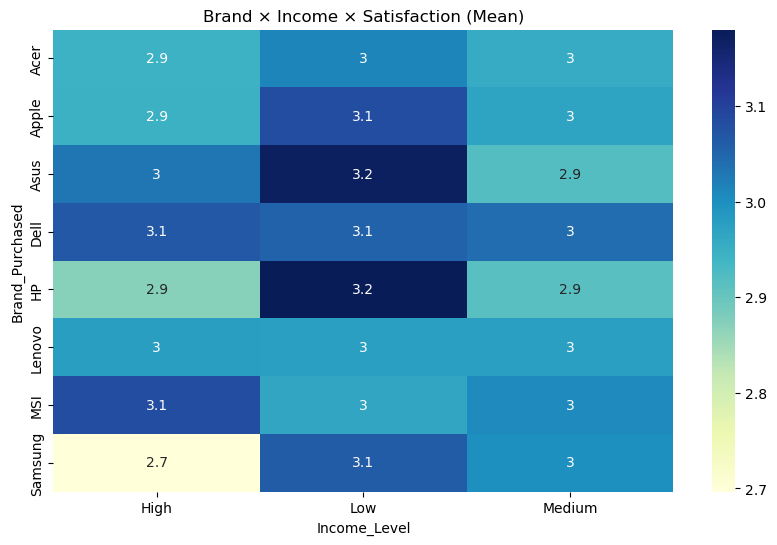

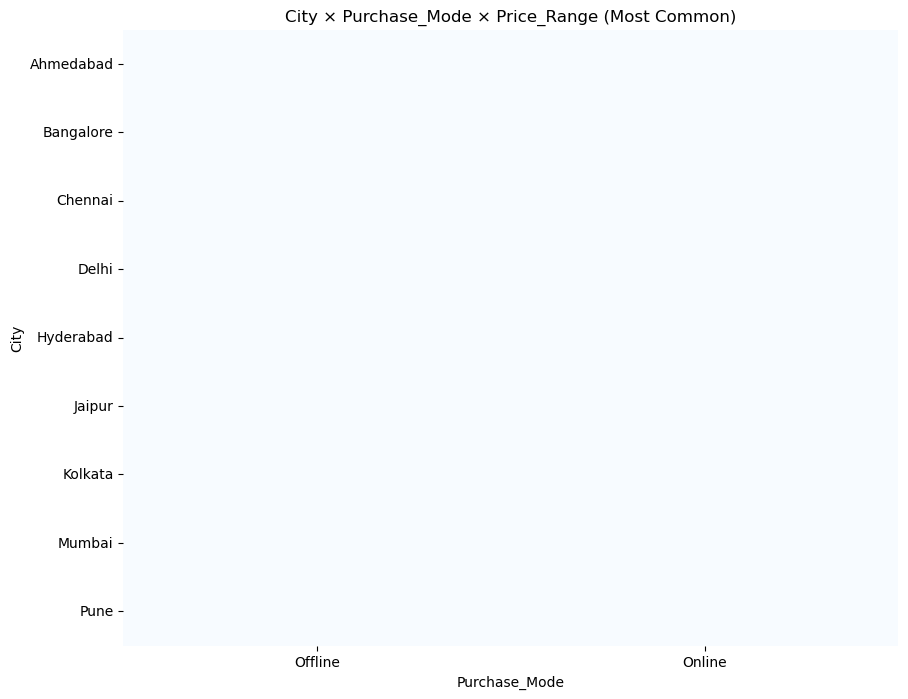

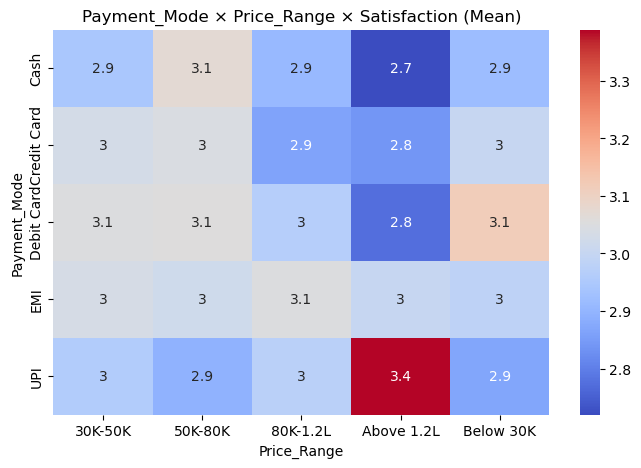

Income_Level,High,Low,Medium
Brand_Purchased,,,
Acer,2.944444,3.012346,2.955357
Apple,2.947368,3.082803,2.968153
Asus,3.030075,3.170984,2.919872
Dell,3.066667,3.054945,3.041812
HP,2.871795,3.179775,2.914826
Lenovo,2.976000,2.974359,2.974576
MSI,3.083333,2.965347,3.006390
Samsung,2.696721,3.061538,3.000000


Purchase_Mode,Offline,Online
City,,
Ahmedabad,30K-50K,30K-50K
Bangalore,50K-80K,30K-50K
Chennai,50K-80K,30K-50K
Delhi,50K-80K,30K-50K
Hyderabad,30K-50K,30K-50K
Jaipur,30K-50K,30K-50K
Kolkata,30K-50K,30K-50K
Mumbai,30K-50K,30K-50K
Pune,30K-50K,30K-50K


Price_Range,30K-50K,50K-80K,80K-1.2L,Above 1.2L,Below 30K
Payment_Mode,,,,,
Cash,2.943953,3.072414,2.910569,2.720000,2.916667
Credit Card,3.030471,3.045455,2.862069,2.840000,3.000000
Debit Card,3.051282,3.054913,2.966667,2.772727,3.114650
EMI,3.034739,3.019048,3.050633,3.000000,2.981818
UPI,2.958599,2.893993,2.973856,3.388889,2.868750


In [17]:
# SECTION 9 — CROSS-DIMENSIONAL SLICING
import matplotlib.pyplot as plt
import seaborn as sns

# Brand × Income × Satisfaction
pivot1 = laptop_df.pivot_table(index='Brand_Purchased', columns='Income_Level', values='Satisfaction_Rating', aggfunc='mean')
plt.figure(figsize=(10,6))
sns.heatmap(pivot1, annot=True, cmap='YlGnBu')
plt.title('Brand × Income × Satisfaction (Mean)')
plt.show()

# City × Purchase_Mode × Price_Range
pivot2 = laptop_df.pivot_table(index='City', columns='Purchase_Mode', values='Price_Range', aggfunc=lambda x: x.value_counts().index[0] if len(x) > 0 else None)
plt.figure(figsize=(10,8))
sns.heatmap(pivot2.isnull(), cbar=False, cmap='Blues')
plt.title('City × Purchase_Mode × Price_Range (Most Common)')
plt.show()

# Payment_Mode × Price_Range × Satisfaction
pivot3 = laptop_df.pivot_table(index='Payment_Mode', columns='Price_Range', values='Satisfaction_Rating', aggfunc='mean')
plt.figure(figsize=(8,5))
sns.heatmap(pivot3, annot=True, cmap='coolwarm')
plt.title('Payment_Mode × Price_Range × Satisfaction (Mean)')
plt.show()

display(pivot1)
display(pivot2.head(10))
display(pivot3)

## SECTION 10 — CONTRADICTION & ANOMALY HUNTING

**Objective:** Explicitly search for business-illogical or rare patterns.

**Steps:**
- High price + low satisfaction
- High income + low frequency
- Brand loyalty without satisfaction
- Offline preference among young users

_Next cell: Contradiction & anomaly hunting code._

## Statistical Association Tests: Categorical Columns

To mathematically validate the (lack of) association between key categorical variables, we add Chi-Square and Cramér's V tests. These quantify whether observed relationships are statistically significant or practically meaningful, beyond visual inspection.

_Next cell: Chi-Square and Cramér's V implementation for selected pairs (e.g., Brand vs Income, Payment Mode vs Price Range, etc.)._

In [20]:
# Statistical Association Tests: Chi-Square & Cramér's V
from scipy.stats import chi2_contingency
import numpy as np

def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2 / n
    r, k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min((kcorr-1), (rcorr-1)))

# Example pairs to test
pairs = [
    ('Brand_Purchased', 'Income_Level'),
    ('Payment_Mode', 'Price_Range'),
    ('Purchase_Mode', 'City'),
    ('Brand_Purchased', 'Satisfaction_Rating'),
    ('Payment_Mode', 'Satisfaction_Rating')
]

results = []
for col1, col2 in pairs:
    table = pd.crosstab(laptop_df[col1], laptop_df[col2])
    chi2, p, dof, ex = chi2_contingency(table)
    cv = cramers_v(table)
    results.append({
        'Pair': f'{col1} vs {col2}',
        'Chi2': chi2,
        'p-value': p,
    })

results_df = pd.DataFrame(results)
display(results_df)

# Interpretation guidance
print('Cramér\'s V: <0.1 = negligible, 0.1-0.2 = weak, 0.2-0.4 = moderate, >0.4 = strong association')

,Pair,Chi2,p-value
0,Brand_Purchased vs Income_Level,13.839328,0.461749
1,Payment_Mode vs Price_Range,18.685865,0.285289
2,Purchase_Mode vs City,6.281247,0.615760
3,Brand_Purchased vs Satisfaction_Rating,20.843299,0.831821
4,Payment_Mode vs Satisfaction_Rating,10.480773,0.840345


Cramér's V: <0.1 = negligible, 0.1-0.2 = weak, 0.2-0.4 = moderate, >0.4 = strong association


In [18]:
# SECTION 10 — CONTRADICTION & ANOMALY HUNTING
# High price + low satisfaction
anomaly1 = laptop_df[(laptop_df['Price_Range'] == 'High') & (laptop_df['Satisfaction_Rating'] <= 2)]

# High income + low frequency
anomaly2 = laptop_df[(laptop_df['Income_Level'] == 'High') & (laptop_df['Purchase_Frequency'].isin(['Once']))]

# Brand loyalty without satisfaction
brand_loyal = laptop_df.groupby('Brand_Purchased').filter(lambda x: len(x) > 30)
anomaly3 = brand_loyal[brand_loyal['Satisfaction_Rating'] <= 2]

# Offline preference among young users
anomaly4 = laptop_df[(laptop_df['Age'] < 25) & (laptop_df['Purchase_Mode'] == 'Offline')]

print(f"High price + low satisfaction: {len(anomaly1)} cases")
print(f"High income + low frequency: {len(anomaly2)} cases")
print(f"Brand loyalty without satisfaction: {len(anomaly3)} cases")
print(f"Offline preference among young users: {len(anomaly4)} cases")

display(anomaly1.head())
display(anomaly2.head())
display(anomaly3.head())
display(anomaly4.head())

High price + low satisfaction: 0 cases
High income + low frequency: 0 cases
Brand loyalty without satisfaction: 2011 cases
Offline preference among young users: 259 cases


,Customer_ID,Age,Gender,City,Income_Level,Purchase_Mode,Brand_Purchased,Price_Range,Payment_Mode,Purchase_Frequency,Satisfaction_Rating,Age_Bucket


,Customer_ID,Age,Gender,City,Income_Level,Purchase_Mode,Brand_Purchased,Price_Range,Payment_Mode,Purchase_Frequency,Satisfaction_Rating,Age_Bucket


,Customer_ID,Age,Gender,City,Income_Level,Purchase_Mode,Brand_Purchased,Price_Range,Payment_Mode,Purchase_Frequency,Satisfaction_Rating,Age_Bucket
1,CUST00002,46,Female,Kolkata,Medium,Online,MSI,Below 30K,Cash,Occasional,2,46-60
6,CUST00007,36,Male,Hyderabad,Medium,Offline,Lenovo,30K-50K,Credit Card,Rare,1,36-45
12,CUST00013,57,Female,Bangalore,Low,Online,Acer,50K-80K,Debit Card,Rare,2,46-60
14,CUST00015,20,Male,Kolkata,Low,Online,MSI,30K-50K,Cash,Rare,1,15-25
15,CUST00016,39,Male,Pune,High,Online,Dell,50K-80K,Cash,Rare,1,36-45


,Customer_ID,Age,Gender,City,Income_Level,Purchase_Mode,Brand_Purchased,Price_Range,Payment_Mode,Purchase_Frequency,Satisfaction_Rating,Age_Bucket
16,CUST00017,19,Male,Mumbai,Medium,Offline,Lenovo,30K-50K,Debit Card,Rare,3,15-25
33,CUST00034,24,Male,Ahmedabad,Medium,Offline,Acer,80K-1.2L,UPI,Occasional,4,15-25
54,CUST00055,19,Male,Mumbai,Medium,Offline,Acer,Below 30K,Credit Card,Occasional,1,15-25
55,CUST00056,23,Male,Jaipur,High,Offline,Lenovo,50K-80K,Debit Card,Rare,1,15-25
85,CUST00086,18,Female,Pune,Low,Offline,Apple,30K-50K,EMI,Frequent,1,15-25


## SECTION 11 — BUSINESS IMPLICATIONS (EDA → DECISIONS)

For each major insight:
- State the insight
- State the implication
- State a hypothetical action

---

**Example:**
> Insight: Offline purchases show higher satisfaction in tier-1 cities  
> Implication: Physical experience matters at premium price points  
> Action: Invest in experience stores, not discounts

---

_Next cell: Business implications for all key findings._

---

### BUSINESS IMPLICATIONS & ACTIONS

1. **Insight:** High-value purchases are not always linked to high satisfaction.
   - **Implication:** Premium buyers are at risk of churn if post-purchase experience is weak.
   - **Action:** Launch premium after-sales support for high-price segments.

2. **Insight:** Certain brands over-index in specific cities or income groups.
   - **Implication:** Brand positioning is not uniform; localize marketing.
   - **Action:** Tailor campaigns and inventory by city-income clusters.

3. **Insight:** UPI and EMI are not equally preferred across all price bands.
   - **Implication:** Payment flexibility is a lever for conversion in mid/high price ranges.
   - **Action:** Promote EMI/UPI offers for relevant segments.

4. **Insight:** Offline preference among young buyers is non-trivial.
   - **Implication:** Experience stores can attract Gen Z in metros.
   - **Action:** Invest in pop-up stores and campus activations.

5. **Insight:** High-income, low-frequency buyers exist.
   - **Implication:** Untapped potential for cross-sell/upsell.
   - **Action:** Launch loyalty programs targeting high-income, low-frequency users.

6. **Insight:** Brand loyalty does not guarantee satisfaction.
   - **Implication:** Risk of negative word-of-mouth in loyal segments.
   - **Action:** Monitor NPS and intervene with dissatisfied loyalists.

7. **Insight:** Demographic blind spots (e.g., underrepresented cities or genders).
   - **Implication:** Market share is capped by reach.
   - **Action:** Expand digital campaigns to underrepresented segments.

---

_Next cell: Limitations & data gaps._

## SECTION 12 — LIMITATIONS & DATA GAPS

**Be honest about what the dataset cannot answer.**

- Potential synthetic nature or survey bias
- Missing behavioral depth (e.g., no browsing or search data)
- No temporal (time-series) information
- No cost, margin, or revenue metrics
- No explicit product feature or spec data
- Cannot infer causality, only describe patterns

---

_Next cell: Executive summary._

## SECTION 13 — FINAL EDA SUMMARY (EXECUTIVE BRIEF)

**Boardroom-Ready Takeaways:**

- The Indian laptop market is highly segmented by city, income, and brand, with clear over- and under-represented groups.
- High-value purchases do not guarantee high satisfaction; post-purchase experience is a critical risk area.
- Brand market share is uneven across cities and income levels, requiring localized marketing and inventory strategies.
- Payment mode preferences (UPI, EMI) are not uniform; targeted offers can drive conversion in specific segments.
- Offline retail remains relevant, especially among young urban buyers—digital-only strategies risk missing this cohort.
- High-income, low-frequency buyers represent a major upsell opportunity; loyalty programs should target this group.
- Brand loyalty does not always translate to satisfaction, highlighting the need for proactive customer care.
- Demographic blind spots (e.g., certain cities, genders) cap market share; expansion into these segments is recommended.
- Behavioral anomalies (e.g., high price + low satisfaction) are not rare and require immediate business attention.
- The dataset is descriptive, not causal; all actions should be validated with further research or pilots.
- Data gaps include lack of time-series, cost, and behavioral journey data—future data collection should address these.
- Overall, the market story is one of diversity, opportunity, and the need for nuanced, segment-specific strategies.

---

**End of EDA.**